## Fraud Detection in Credit Card Transactions using ML Techniques

#### Introduction

In this project we have build different machine learning models and compared them to check which model gives the best resultcto classify or identify fraudulent card transactions from a given card transactions data.

Used the following classification models.

* Logistic Regression
* KNN
* Decision Tree
* Random forest
* XGBoost

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

## Exploratory data analysis

In [2]:
df = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\dataset\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.shape


(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Insight:**
* Since the data is PCA transformed all features are expected to be normally distributed. The data does not have any null value. Each feature has 284807 observations.
* The datatype of the 'Class' variable is int. Since we know that the Class vaiable should be categorical (0: non fraud & 1:fraud), we must change the datatype.

In [6]:
#Changing the data type of Class

df['Class'] = df['Class'].astype('category')

#Renaming the classes
df['Class'] = df['Class'].cat.rename_categories({1:'Fraudulent',0:'Non_Fraudulent'})

df['Class']

0         Non_Fraudulent
1         Non_Fraudulent
2         Non_Fraudulent
3         Non_Fraudulent
4         Non_Fraudulent
               ...      
284802    Non_Fraudulent
284803    Non_Fraudulent
284804    Non_Fraudulent
284805    Non_Fraudulent
284806    Non_Fraudulent
Name: Class, Length: 284807, dtype: category
Categories (2, object): [Non_Fraudulent, Fraudulent]

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
print(normal_share)
fraud_share=classes[1]/df['Class'].count()*100
print(fraud_share)

99.82725143693798
0.1727485630620034


In [8]:
#Creating a df for percentage of each class
class_share = {'Class':['fraudulent','non_fraudulent'],'Percentage':[fraud_share,normal_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


The data is imbalanced. Only 0.172% of total cases are positive. 

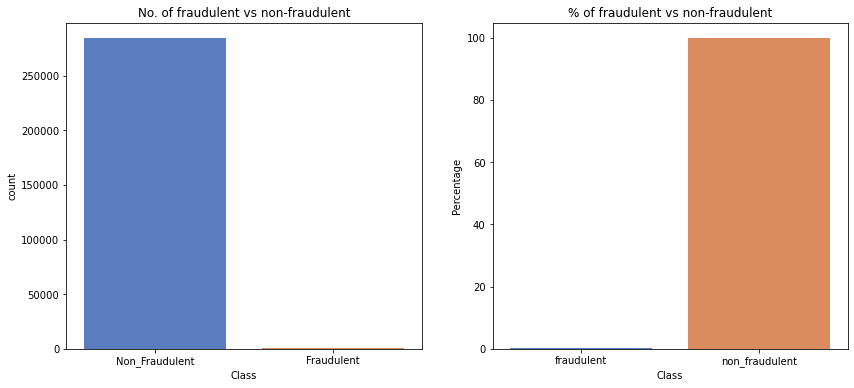

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.set_palette("muted")
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot('Class',data=df)
plt.title('No. of fraudulent vs non-fraudulent')

plt.subplot(122)
sns.barplot(x='Class', y='Percentage',data=class_share)
plt.title('% of fraudulent vs non-fraudulent')
plt.show()


The no. of fraudulent cases are quite insignificant compared to the non-fraudulent cases. This is a highly unbalnced dataset.

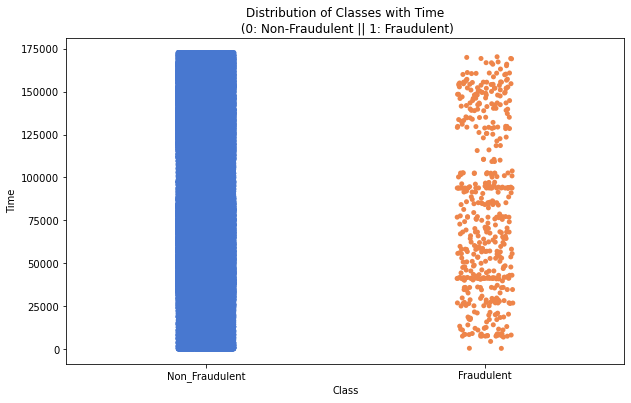

In [10]:
# Create a scatter plot to observe the distribution of classes with time
#sns.set_palette("muted")
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()


**Insight:**
*   From the above plot we observe that there isn't any
particular time interval at which fraudulent transactions happen. It can happen at any time. 
* The Time column is evenly distributed for fraudulent transactions and doesn't seem to have any role in deciding whether a transaction is fraud or not.

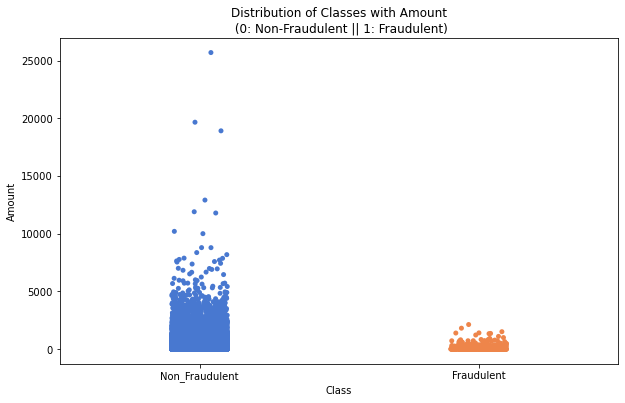

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

**Insight:** 

*   The fraudulent transactions do not have any high amount transactions. The maximum amount for a fraudulent transaction is somewhere around $2500. 
 



In [12]:
# Drop unnecessary columns
# Dropping the column 'Time' since it does not have any impact on deciding a fraud transaction

df=df.drop('Time',axis=1)
df.shape

(284807, 30)

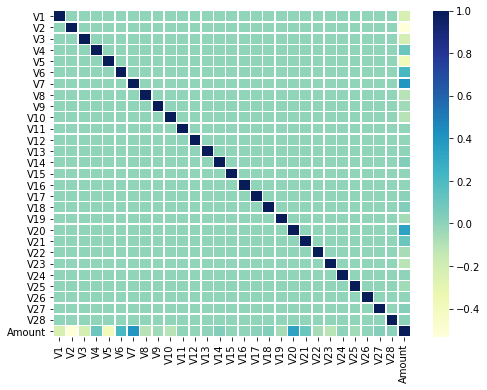

In [13]:
#Plotting heatmap to check the coorelation

plt.figure(figsize=(8,6))

sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')

plt.show()

* V7 and V20 seem to have positive correlation with the feature 'Amount'. Since this is a PCA converted data, there isn't much to conclude from the heatmap.

### Splitting the data into train & test data

In [14]:
y= df.iloc[:,-1] #class variable
X = df.iloc[:,:-1]


In [15]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

#Using stratify=y so that proportion of each class is same in both train and test set

##### Here i have preserve X_test & y_test to evaluate on the test data once the model gets build

In [16]:
print('Total count for each class:\n', y.value_counts())
print("\nCount of each class in train data:\n",y_train.value_counts())
print("\nCount of each class in test data:\n",y_test.value_counts())

Total count for each class:
 Non_Fraudulent    284315
Fraudulent           492
Name: Class, dtype: int64

Count of each class in train data:
 Non_Fraudulent    227451
Fraudulent           394
Name: Class, dtype: int64

Count of each class in test data:
 Non_Fraudulent    56864
Fraudulent           98
Name: Class, dtype: int64


### Plotting the distribution of a variable

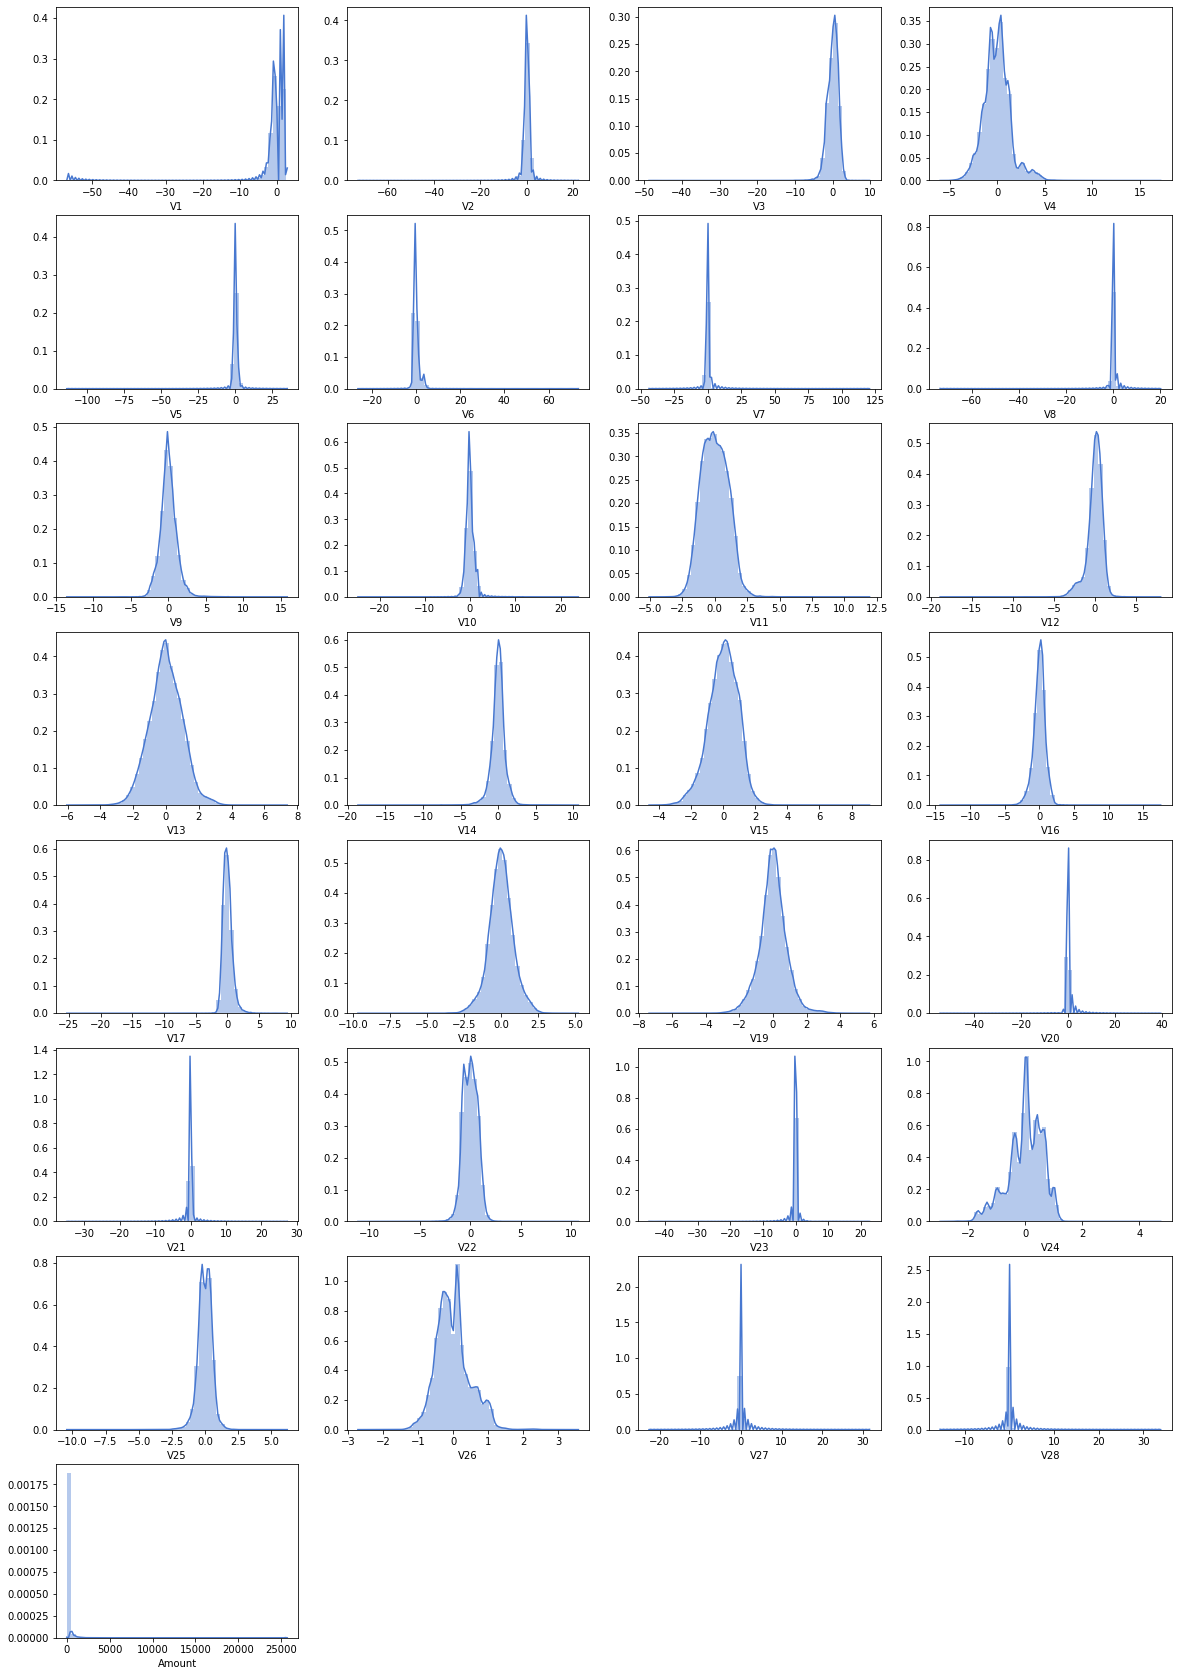

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
# ploting distribution plot for all columns to check the skewness

#Loop for creating distplot.

collist = list(X_train.columns)

c = len(collist)
m = 1
n = 0

plt.figure(figsize=(20,30))

for i in collist:
  if m in range(1,c+1):
    plt.subplot(8,4,m)
    sns.distplot(X_train[X_train.columns[n]])
    m=m+1
    n=n+1

plt.show()




**Insight:**


*   We plotted distribution plots for all the variables and it is clearly that there are some variables which are skewed either towards left or right.
*   This means all variables are not normally distributed as expected even if this is a PCA transformed dataset.

* We must transform the data to remove the skewness.



### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# Using ‘yeo-johnson’ method since it works with positive and negative values. It is used to improve normality or symmetry


from sklearn.preprocessing import power_transform

X_train = power_transform(X_train,method='yeo-johnson')
X_test = power_transform(X_test,method='yeo-johnson')

In [19]:
# Converting X_train & X_test back to dataframe
cols = X.columns

X_train = pd.DataFrame(X_train)
X_train.columns = cols

X_test = pd.DataFrame(X_test)
X_test.columns = cols


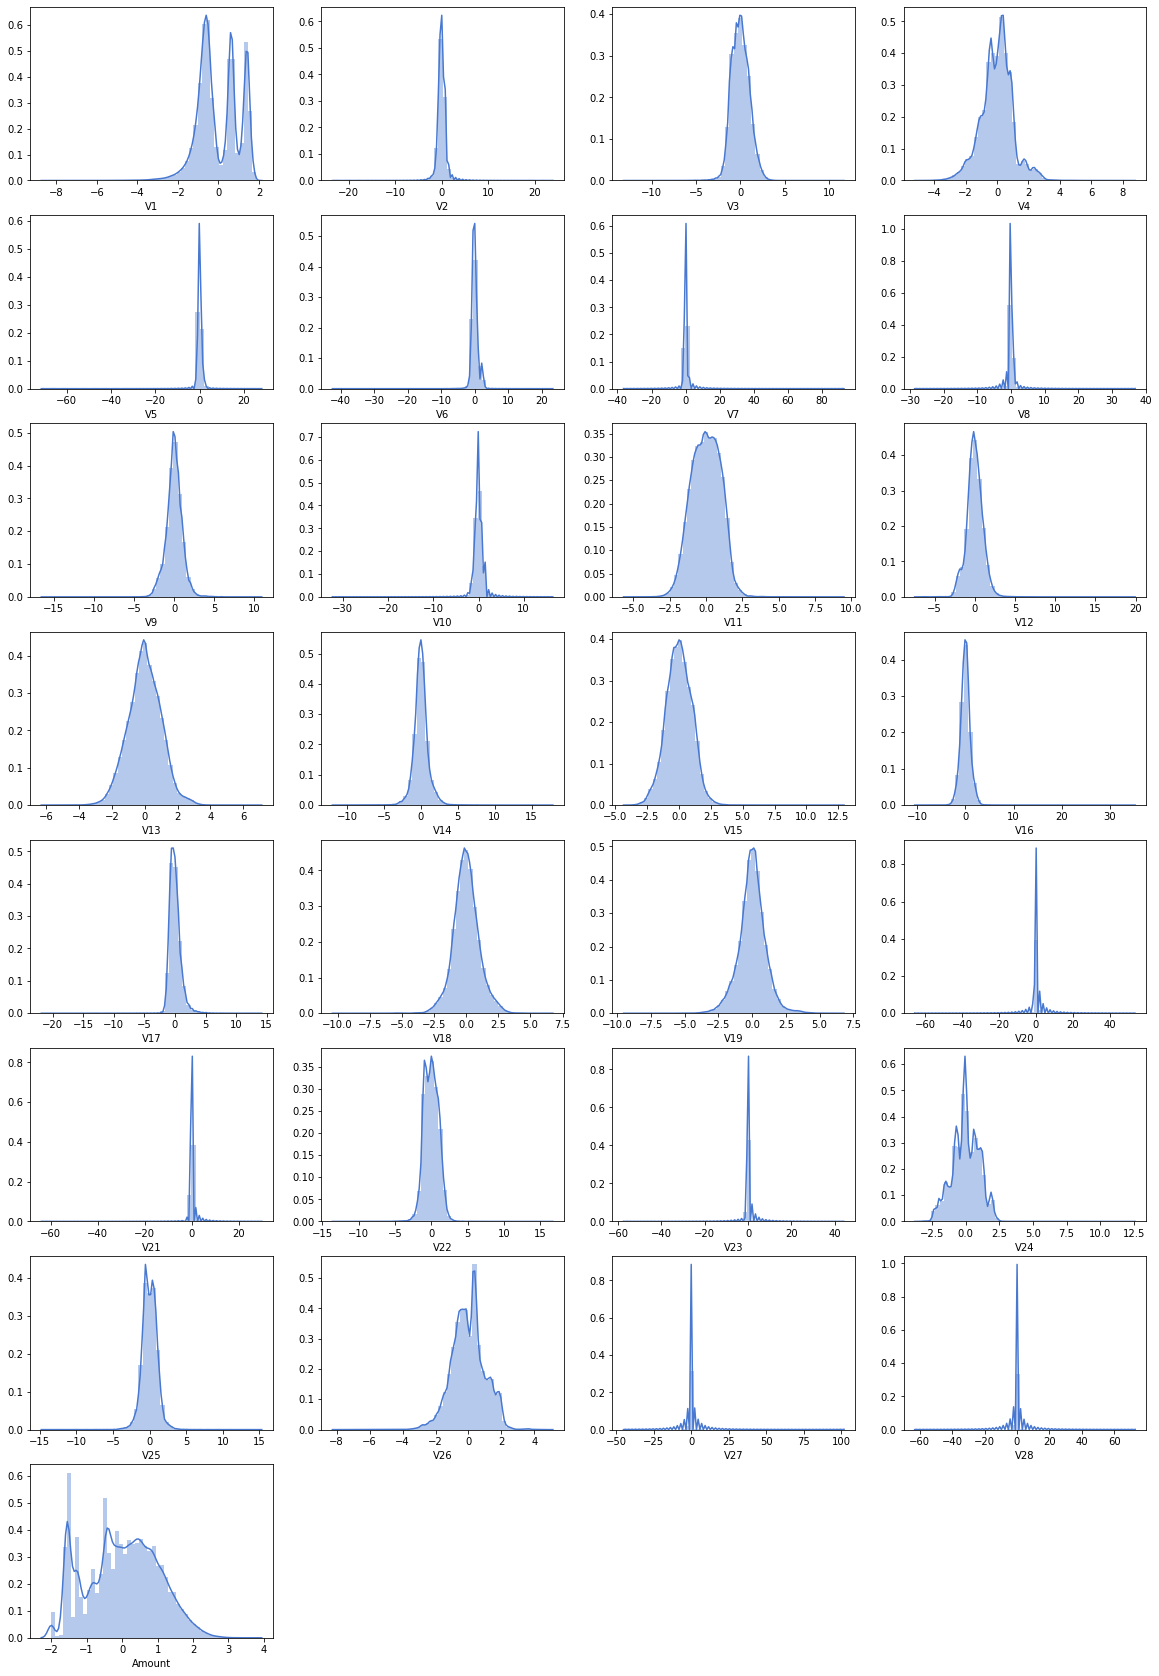

In [20]:
# plot the histogram of a variable from the dataset again to see the result 
# Plotting same set of variables as earlier to identify the difference.

#Loop for creating distplot.

collist = list(X_train.columns)

c = len(collist)
m = 1
n = 0

plt.figure(figsize=(20,30))

for i in collist:
  if m in range(1,c+1):
    plt.subplot(8,4,m)
    sns.distplot(X_train[X_train.columns[n]])
    m=m+1
    n=n+1

plt.show()



**Insight:**


*   After the Power transformation the variables are more gaussian like.
*   Changes in V1, V12, V26 and Amount coulmn are quite evident. Skewness has been removed to some extent.



### **Model performance parameter:**


*   We will use ROC curve and find AUC Score as the performance matrix for the models.
*  ROC curve meausres the performance of the model at different thresholds which will help us find the optimum threshold for the model.



In [21]:
# Function to plot ROC curve and classification score which will be used for each model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

def clf_score(clf):
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob, pos_label='Non_Fraudulent')
    plot_roc(fpr,tpr)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
    return auc


## Model Building on the dataset


### Logistic Regression

In [22]:
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import GridSearchCV


In [23]:
num_C = [0.001,0.01,0.1,1,10,100] #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('')

C: 0.001
Coefficient of each feature: [[ 0.05827245 -0.03231278  0.15258413 -0.2303827  -0.03251785  0.04418223
   0.06092596  0.1053219   0.11901376  0.23577849 -0.17897772  0.23620764
   0.0429589   0.40046756  0.01684527  0.118289    0.11039617  0.00086577
   0.00221737 -0.01263307 -0.02883974 -0.03215089  0.03304381  0.02416244
   0.00155655 -0.01639014 -0.00758294  0.00107762  0.01629961]]
Training accuracy: 0.9990344313019817
Test accuracy: 0.9988939995084443

C: 0.01
Coefficient of each feature: [[ 0.15546705  0.08584789  0.26579153 -0.57537251 -0.01738138 -0.03487857
   0.11891721  0.19132465  0.16632621  0.22402918 -0.16014372  0.44675415
   0.14777179  0.65203773  0.11114447  0.20586739  0.02118281 -0.0613255
   0.05790786  0.00283988 -0.04986379 -0.1719924   0.0859131  -0.00722106
  -0.04617946 -0.0330326   0.05303884  0.03400267 -0.00360083]]
Training accuracy: 0.999223156092958
Test accuracy: 0.9990695551420246

C: 0.1
Coefficient of each feature: [[ 0.21452938  0.22263954



*   The best C value is the one for which the difference between train and test score is the least.
*   In our case the best value of C=0.1



In [24]:
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

#perform hyperparameter tuning



#print the optimum value of hyperparameters

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9803975962273005




*   Best parameters :  {'C': 0.01, 'penalty': 'l2'}




AUC: 0.98


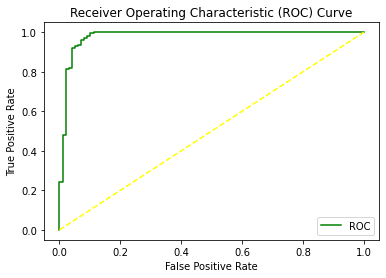

                precision    recall  f1-score   support

    Fraudulent       0.87      0.54      0.67        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.93      0.77      0.83     56962
  weighted avg       1.00      1.00      1.00     56962



0.9799370930139079

In [25]:
# Fitting the model with best parameters .

lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score(lsr_clf)



*   The AUC score is 0.98 .




### KNN

In [26]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# Taking only odd integers as K values to apply the majority rule. 
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
k_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [ ]:
# Finding the best k with stratified K-fold method. 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.

for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)
  score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]


In [ ]:
#Plotting a line plot to decide optimum value of K

plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(k_range,mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(k_range,scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()





*   From the above plot optimum K value is 3 for KNN





In [ ]:
#Fitting the best parameter to the model
# 3 fold cross validation with K=3

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)



AUC: 0.94


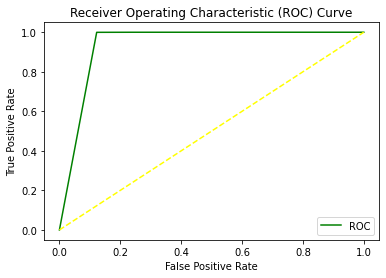

                precision    recall  f1-score   support

    Fraudulent       0.96      0.77      0.85        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.938721047999954

In [29]:
# Checking AUC 

clf_score(knn_clf)


* The KNN model with the given data gives AUC of 0.94  which is pretty good but recall is 0.77.

### Decision Tree

In [30]:
#importing libraries

from sklearn import tree
from pprint import pprint


In [31]:
# 5 fold cross validation for getting best parameter

depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score)

[0.9990783207882552, 0.9992889903223684, 0.9993065461168777, 0.9994250477298163, 0.9994777151133446, 0.9994908819592266, 0.9994513814215805, 0.9994513814215805, 0.9994162698325615, 0.9994162698325615, 0.9993943250894249, 0.9993504356031513, 0.9993065461168777, 0.9993109350655051, 0.9992670455792314, 0.9992582676819767, 0.9992494897847222, 0.9992714345278587, 0.9992363229388399]


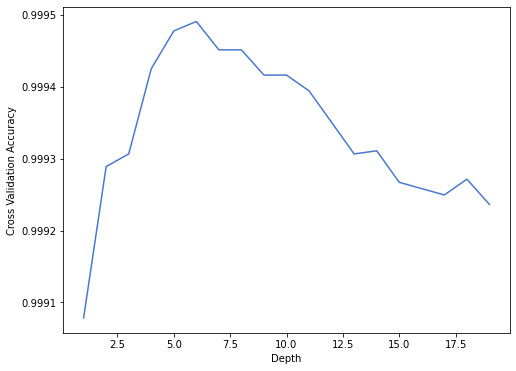

In [32]:
#Plotting depth against score

plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()



* The score for depth=5 is the highest. We will use this in our model.




AUC: 0.86


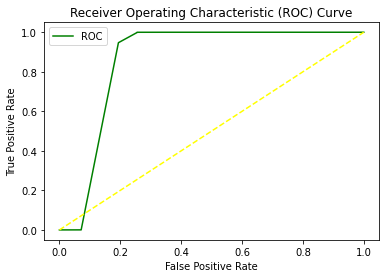

                precision    recall  f1-score   support

    Fraudulent       0.92      0.69      0.79        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.96      0.85      0.90     56962
  weighted avg       1.00      1.00      1.00     56962



0.8624312538042791

In [33]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)

#Plotting ROC
clf_score(dt_clf)

* The AUC score for decision tree is only 0.86 which is not satisfactory. The precison and recall are also lower than KNN and logistic regression model.

### Random Forest Classifier

In [34]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [35]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 30}
accuracy : 0.9787420083411495


* We will use these parameters for Random forest  {'max_depth': 9, 'n_estimators': 30}. The Accuracy is 0.97 which is very good.

AUC: 0.97


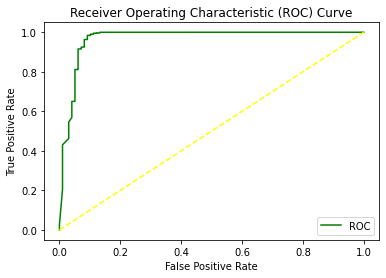

                precision    recall  f1-score   support

    Fraudulent       0.97      0.70      0.82        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.99      0.85      0.91     56962
  weighted avg       1.00      1.00      1.00     56962



0.9672799691063821

In [36]:
#Fitting model and plotting ROC

rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_clf = rf.fit(X_train,y_train)

#Plotting ROC
clf_score(RFC_clf)


* We are getting very good precision(0.97) for Faudulent class which is very good along with the AUC of 0.97

### XGBoost Classifier

In [37]:
#import libraries

from xgboost import XGBClassifier
from scipy import stats

In [38]:
# Using grid search cv to find the best parameters.

xgbst = XGBClassifier()

param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150}
accuracy : 0.9841209585735301


* We got the best parameters for XGboost as following.

tuned hpyerparameters : {'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150}
AUC : 0.9850958755280601

AUC: 0.98


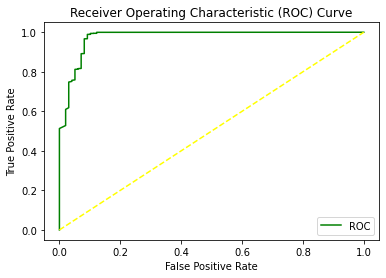

                precision    recall  f1-score   support

    Fraudulent       0.97      0.79      0.87        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.99      0.89      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.9757821741527224

In [39]:
#Fitting the model with best parameters.

xgbst = XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=3)

xgb_clf = xgbst.fit(X_train,y_train)

#Plotting ROC
clf_score(xgb_clf)


* We are getting AUC of 0.98 with f1-score of 0.87 which is good.
* Recall is 0.79 which is better than our other models.

#### Proceed with the model which shows the best result 


* Out of the 5 models XGBoost performed the best with AUC of 0.98 and Recall of 0.78.

## Choosing the Best Model.

- To save banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions but we can not have a very low precision.

- Scores of Logistic Regression:

          AUC : 0.98 

          Recall: 0.54

          Precision: 0.87

          f1-Score : 0.67         

- Scores of KNN model:

          AUC : 0.94 

          Recall: 0.88

          Precision: 0.61

          f1-Score : 0.72
          
- Scores of Decision Tree model:

          AUC : 0.86 

          Recall: 0.69

          Precision: 0.92

          f1-Score : 0.79

- Scores of Random Forest model:

          AUC : 0.97 

          Recall: 0.70

          Precision: 0.97

          f1-Score : 0.82
          
- Scores of XGBoost Classifier model:

          AUC : 0.98 

          Recall: 0.79

          Precision: 0.97

          f1-Score : 0.87


- Comparing all algorithms we can see that the XGBoost Classifier model has more AUC score and also better f1-score (Which is a result of better precision and recall) than other algorithms model.

- So the XGBoost Classifier model is our final model.